<a href="https://colab.research.google.com/github/Seshasai14/DataScience-TuteDude/blob/Tumor-Detection/Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing the Data:**

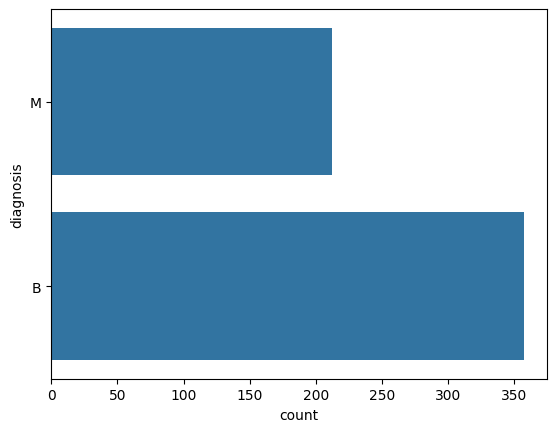

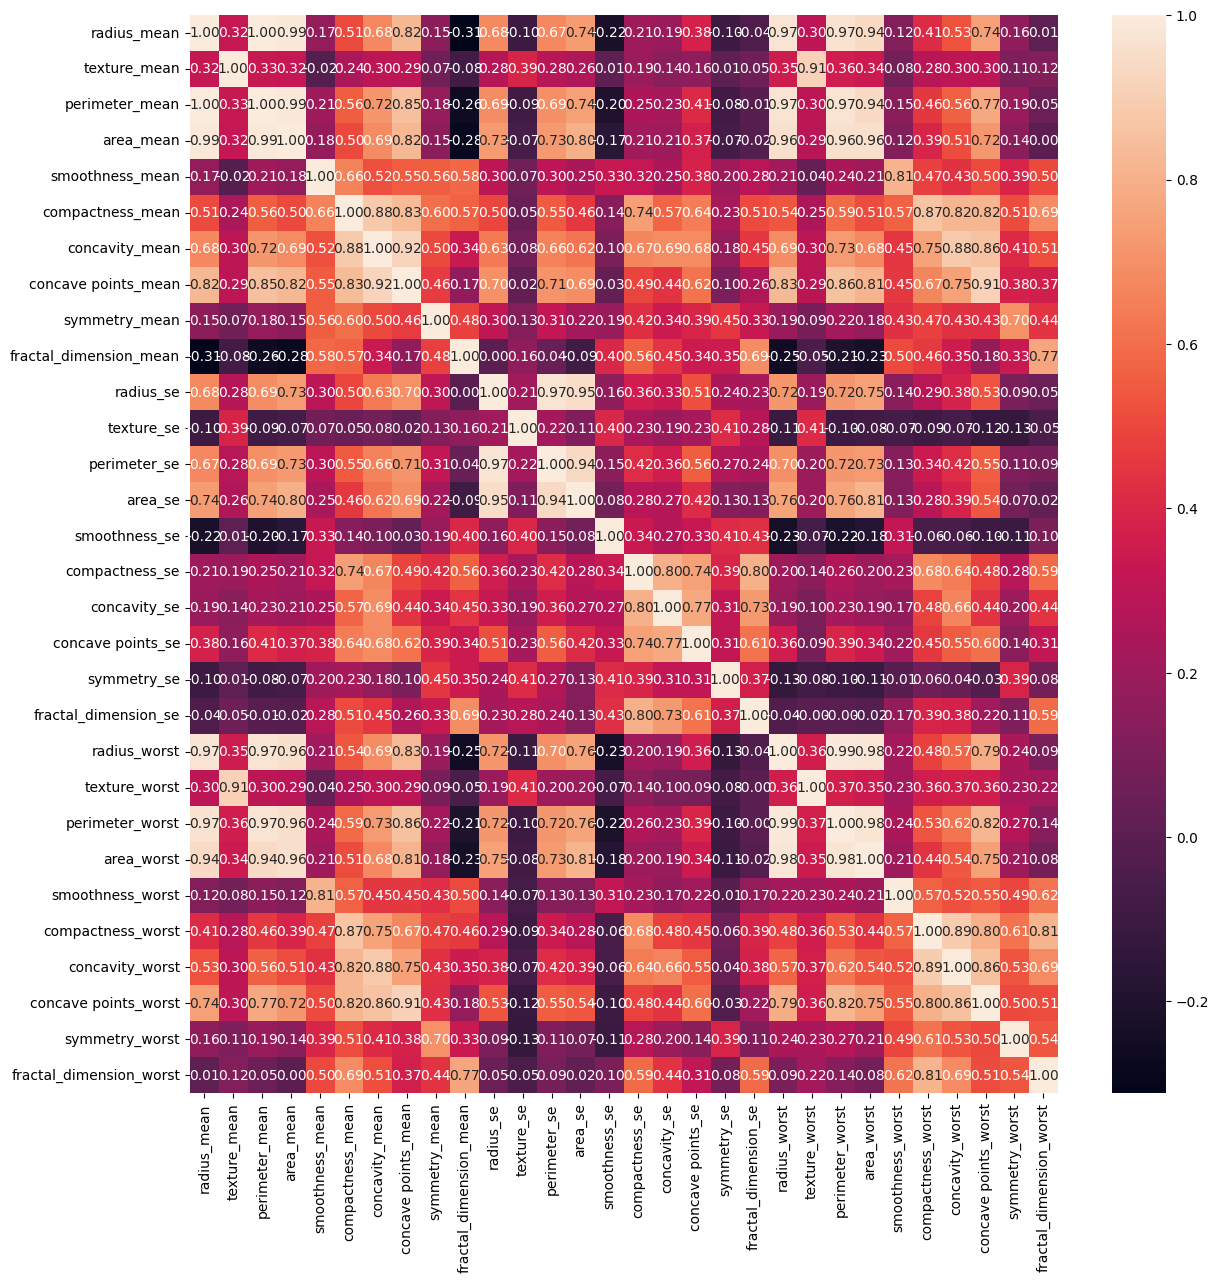

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and Reading CSV file
df = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/AIML-B2/main/data.csv')

# Removing unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Define features
features_mean = df.columns[1:11]
features_se = df.columns[11:21]
features_worst = df.columns[21:]

# Plot diagnosis count
sns.countplot(df['diagnosis'], label='count')

# Calculate correlation matrix
# Exclude non-numeric columns before computing the correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Display correlation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].unique()
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']
y
x.head()
df.head()

# **Training The Data Set**

In [20]:
#divide the dataset into train and testset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# sc=StandardScaler()
# x=sc.fit_transform(x)
# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
df.shape
x_train.shape
x_test.shape
y_train.shape
y_test.shape
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
x_train

array([[ 0.93010388,  1.36487616,  0.87040672, ...,  0.8647464 ,
        -0.678845  , -0.29804866],
       [-1.07887858, -0.92160533, -1.07649795, ..., -1.08879416,
        -0.49694268, -0.13140104],
       [-0.35823333, -1.23151999, -0.29697059, ...,  0.59573029,
        -0.45898045,  1.66890603],
       ...,
       [ 0.23298991,  0.70142922,  0.43237443, ...,  1.97708266,
        -0.09992109,  1.5509708 ],
       [-0.87592135, -0.65530829, -0.91276743, ..., -1.15226987,
        -0.86391084, -0.73953666],
       [ 0.9065726 ,  0.59582867,  0.83638479, ...,  1.23502138,
         0.45369468, -0.48982161]])

In [22]:
#Apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
# y_pred

0.9649122807017544
